In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Loading the data into our pandas dataframe
data = pd.read_csv('Financial Data.csv')

# Checking the first 5 entries of Dataframe
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
# Checking the column names and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

## Cleaning the data

In [4]:
# Check if there is any NULl value
data.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

### Plotting the Data and check for patterns

In [5]:
# For this we will remove columns : [entry_id, pay_schedule, e_signed]
eda_data = data.drop(['entry_id', 'pay_schedule', 'e_signed'], axis = 1)
eda_data.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


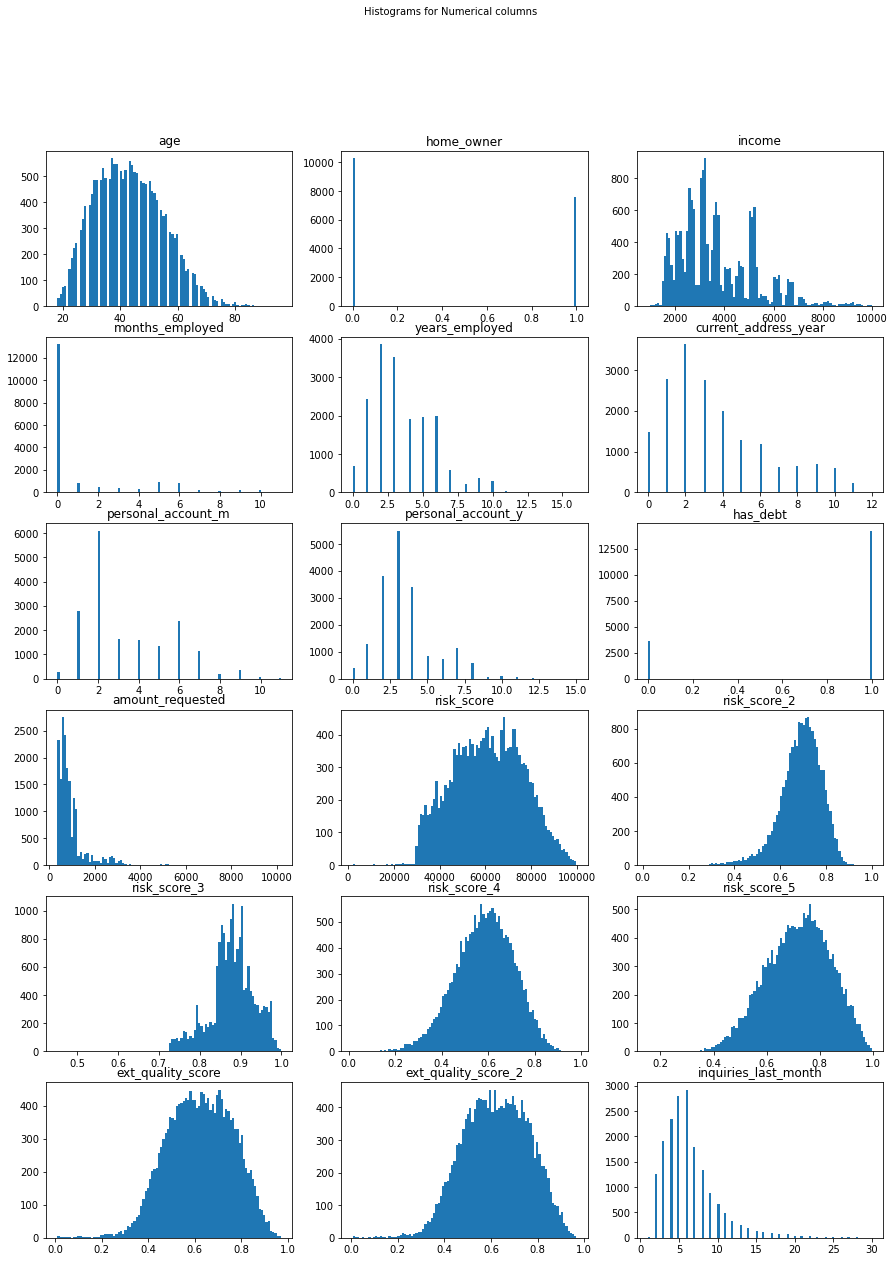

In [27]:
# Reviewing the distribution of Numerical columns

# Setting figure size
fig = plt.figure(figsize=(15,20))
plt.suptitle("Histograms for Numerical columns", fontsize = 10)

# Looping through each column:
for i in range(len(eda_data.columns)):
    plt.subplot(6,3, i+1) # Creating sub plots with 6 rows and 3 columns
    f = plt.gca() # Extracting details of the current axes
    f.set_title(eda_data.columns[i])
    
    # Since the range of the numerical columns distributions is not fixed, we will set the bins to 100 if it exceeds 100
    vals = len(eda_data.iloc[:,i])
    if vals > 100:
        vals = 100
    
    plt.hist(eda_data.iloc[:,i], bins = vals)    
#plt.tight_layout(rect=[0, 0.3, 1, 0.95])

#### Observations from above Histogram plot:
###### 1. Almost Normal distribution can be seen across all the features
###### 2. Home Owner is a Categorical Feature
###### 3. Month Employeed and Month Personal Account owned needs to be analysed as the distribution is around 0 and 2

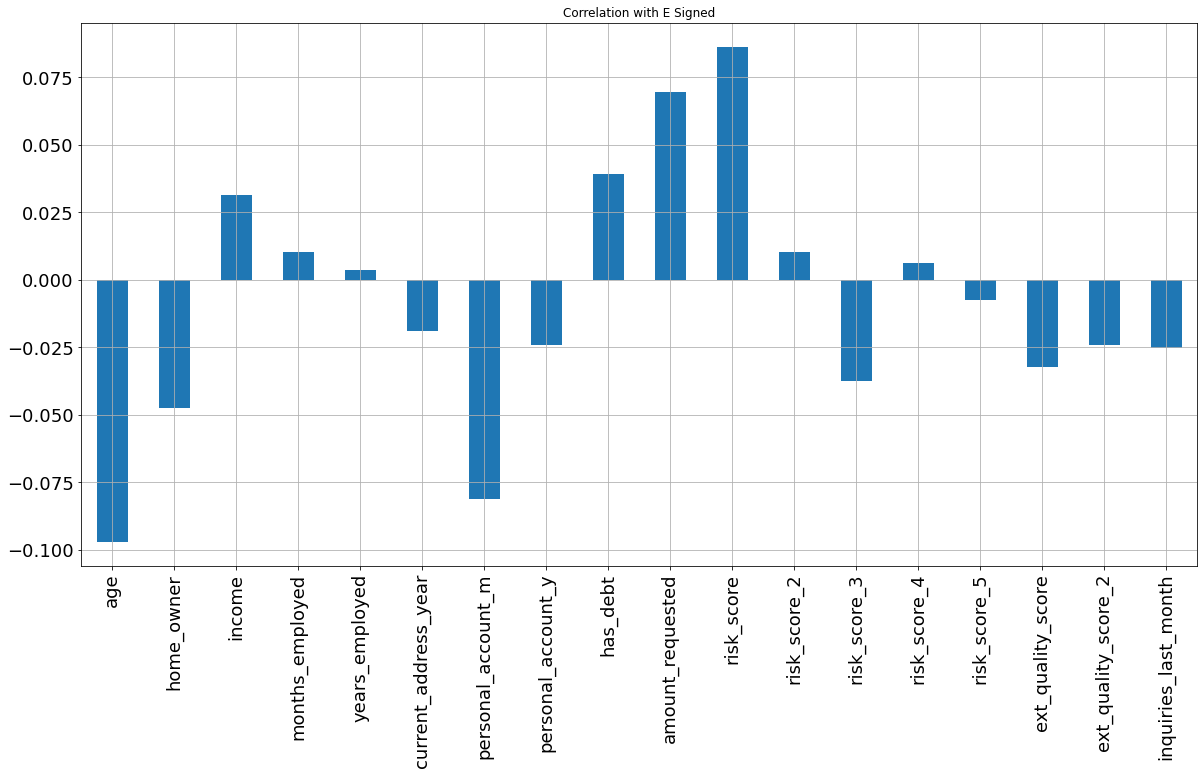

In [31]:
# Checking the correlation of Features with the Target variable
eda_data.corrwith(data.e_signed).plot.bar(figsize = (20,10), title = 'Correlation with E Signed', fontsize = 18, rot = 90, grid = True)
plt.show()

#### Observations from Correlation Plot:
##### 1. Increase in Age decreases the chances of Loan E Signing
##### 2. Home Owners are less likely to take loans
##### 3. Personal Account Months and Year features to be treated for better understanding of relationship.
##### 4. More the amount of loan requested, chances of E Signing increases.
##### 5. Increase in Risk Score, increases the chances of Signing.

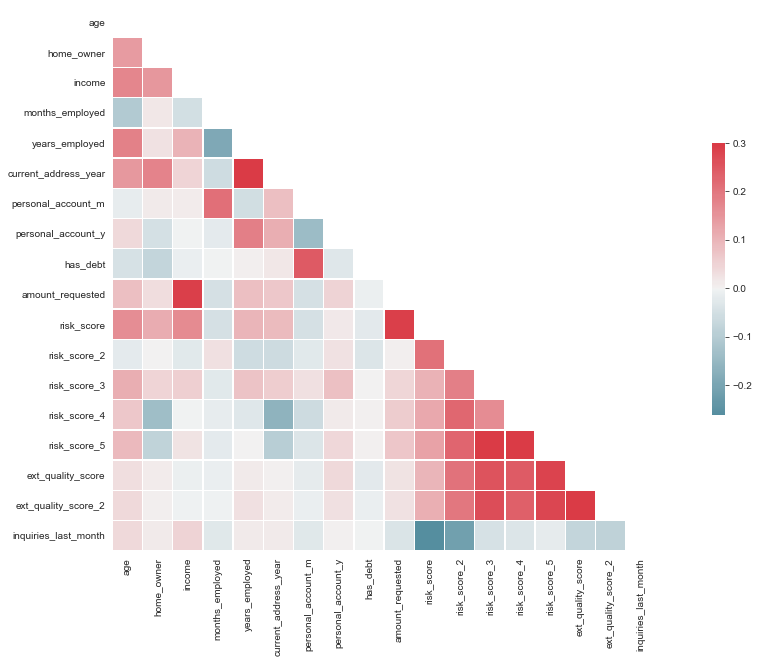

In [37]:
# Compute the Correlation Matrix to determine relationships within Features

sns.set_style('white')

# Computing the Correlation Matrix
corr = eda_data.corr()

# Generate mask for Upper triangle
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a customer diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap= True)

# Drawing Heatmap
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths= .5, cbar_kws= {"shrink" : .5})
plt.show()

#### Observations:
##### 1. High Income Applicants have higher Loan Amount request
##### 2. Experience of Applicant in Work is correlated with the Year of resindence in current address
##### 3. Higher the Risk Score, Higher is the amount requested